# Day 13 – Basic Customer Segmentation
## E-Commerce Customer Behavior & Sales Analysis

Objective:
Segment customers based on total spending and number of purchases
to understand different customer value groups.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/ecommerce_cleaned.csv")
df.head()

,order_id,customer_id,date,age,gender,city,product_category,unit_price,quantity,discount_amount,total_amount,payment_method,device_type,session_duration_minutes,pages_viewed,is_returning_customer,delivery_time_days,customer_rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [3]:
customer_summary = (
    df.groupby("customer_id")
      .agg(
          total_spent=("total_amount", "sum"),
          order_count=("order_id", "count")
      )
      .reset_index()
)

customer_summary.head()


,customer_id,total_spent,order_count
0,CUST_00001,219.32,1
1,CUST_00002,332.34,1
2,CUST_00003,66.44,1
3,CUST_00004,112.65,1
4,CUST_00005,349.45,1


In [4]:
customer_summary.describe()

,total_spent,order_count
count,5000.000000,5000.0
mean,983.108914,1.0
std,1898.978528,0.0
min,7.870000,1.0
25%,122.517500,1.0
50%,337.910000,1.0
75%,979.695000,1.0
max,22023.900000,1.0


In [5]:
def segment_customer(row):
    if row["total_spent"] > customer_summary["total_spent"].quantile(0.75):
        return "High Value"
    elif row["total_spent"] > customer_summary["total_spent"].quantile(0.25):
        return "Medium Value"
    else:
        return "Low Value"

customer_summary["segment"] = customer_summary.apply(segment_customer, axis=1)
customer_summary.head()

,customer_id,total_spent,order_count,segment
0,CUST_00001,219.32,1,Medium Value
1,CUST_00002,332.34,1,Medium Value
2,CUST_00003,66.44,1,Low Value
3,CUST_00004,112.65,1,Low Value
4,CUST_00005,349.45,1,Medium Value


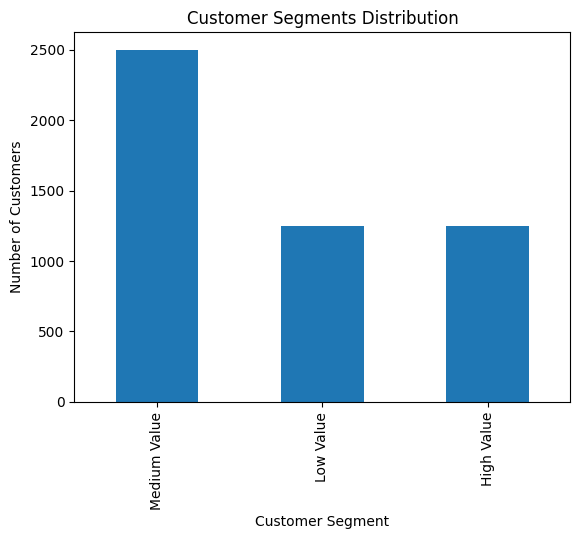

In [6]:
customer_summary["segment"].value_counts().plot(kind="bar")
plt.title("Customer Segments Distribution")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.show()

## Key Insights

- A small group of customers falls into the High Value segment.
- Medium Value customers represent the majority and are growth targets.
- Low Value customers may benefit from promotions or engagement strategies.

This segmentation helps businesses prioritize retention and marketing efforts.
